# Machine Learning model building with scikit-learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_style("white")

In [2]:
#import data and clean for ML runs
df1 = pd.read_csv('data/MMP9_sm_mldescriptors.csv')
df_ana = pd.read_csv('data/MMP9_sm_activity_proc3.csv')
df_ana = df_ana.drop(columns=['molecule_chembl_id', 'canonical_smiles', 'standard_value','activity_class','pIC50'])
df2 = pd.concat([df_ana,df1], axis=1)
df3 = df2[np.isfinite(df2).all(1)]
df3 = df3.reset_index()
df3

,index,MW,LogP,NumHDonors,NumHAcceptors,TPSA,ADV_affinity,PubchemFP0,PubchemFP1,PubchemFP2,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,448.54,2.06,2.00,7.00,105.17,-9.50,1,1,1,...,0,0,0,0,0,0,0,0,0,7.47
1,1,434.51,2.02,2.00,7.00,105.17,-9.10,1,1,1,...,0,0,0,0,0,0,0,0,0,8.05
2,2,515.46,4.49,2.00,6.00,95.94,-8.30,1,1,1,...,0,0,0,0,0,0,0,0,0,7.70
3,3,480.59,3.58,2.00,6.00,95.94,-9.80,1,1,1,...,0,0,0,0,0,0,0,0,0,8.52
4,4,429.93,2.23,2.00,6.00,108.83,0.00,1,1,1,...,0,0,0,0,0,0,0,0,0,8.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,2363,408.63,3.46,3.00,4.00,58.20,-8.20,1,1,1,...,0,0,0,0,0,0,0,0,0,9.24
2363,2364,401.45,1.82,2.00,7.00,127.07,-9.50,1,1,1,...,0,0,0,0,0,0,0,0,0,6.96
2364,2365,424.43,2.48,3.00,5.00,121.28,-11.30,1,1,1,...,0,0,0,0,0,0,0,0,0,4.13
2365,2366,404.90,2.07,2.00,4.00,81.75,-9.50,1,1,1,...,0,0,0,0,0,0,0,0,0,4.70


In [3]:
#designate x and y values for ML models
x_values = df3.drop('pIC50', axis=1)
y_values = df3['pIC50']

In [4]:
#remove low variance features for improved processing
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x_values = selection.fit_transform(x_values)
x_values.shape

(2367, 156)

## Data split for ML models

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=7)

In [6]:
X_train.shape, Y_train.shape

((1893, 156), (1893,))

In [7]:
X_test.shape, Y_test.shape

((474, 156), (474,))

## Regression model using Random Forest

In [8]:
model = RandomForestRegressor(n_estimators=150)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6675206787298689

In [9]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

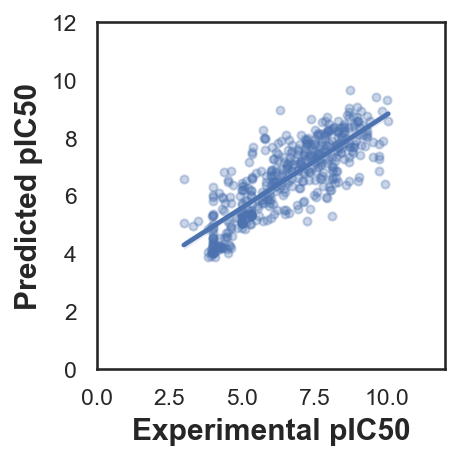

In [10]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.3, 's':15})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(3, 3)
plt.show

# Evaluate different machine learning models

In [11]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:35<00:00,  5.14s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:17<00:00,  4.70s/it]


In [12]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,1.00,1.00,0.00,3.40
DecisionTreeRegressor,1.00,1.00,0.00,0.10
ExtraTreeRegressor,1.00,1.00,0.00,0.06
GaussianProcessRegressor,1.00,1.00,0.00,1.14
XGBRegressor,0.99,0.99,0.17,0.30
RandomForestRegressor,0.95,0.95,0.37,3.71
BaggingRegressor,0.92,0.93,0.45,0.43
HistGradientBoostingRegressor,0.90,0.91,0.49,2.07
LGBMRegressor,0.90,0.91,0.51,0.15


In [13]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.50,0.67,0.96,1.65
LGBMRegressor,0.49,0.66,0.96,0.18
RandomForestRegressor,0.48,0.65,0.98,3.83
GradientBoostingRegressor,0.44,0.63,1.01,1.12
XGBRegressor,0.42,0.61,1.04,0.32
BaggingRegressor,0.41,0.61,1.04,0.41
SVR,0.39,0.59,1.06,0.43
NuSVR,0.39,0.59,1.06,0.33
ExtraTreesRegressor,0.34,0.56,1.10,3.13


[(0.0, 1.0)]

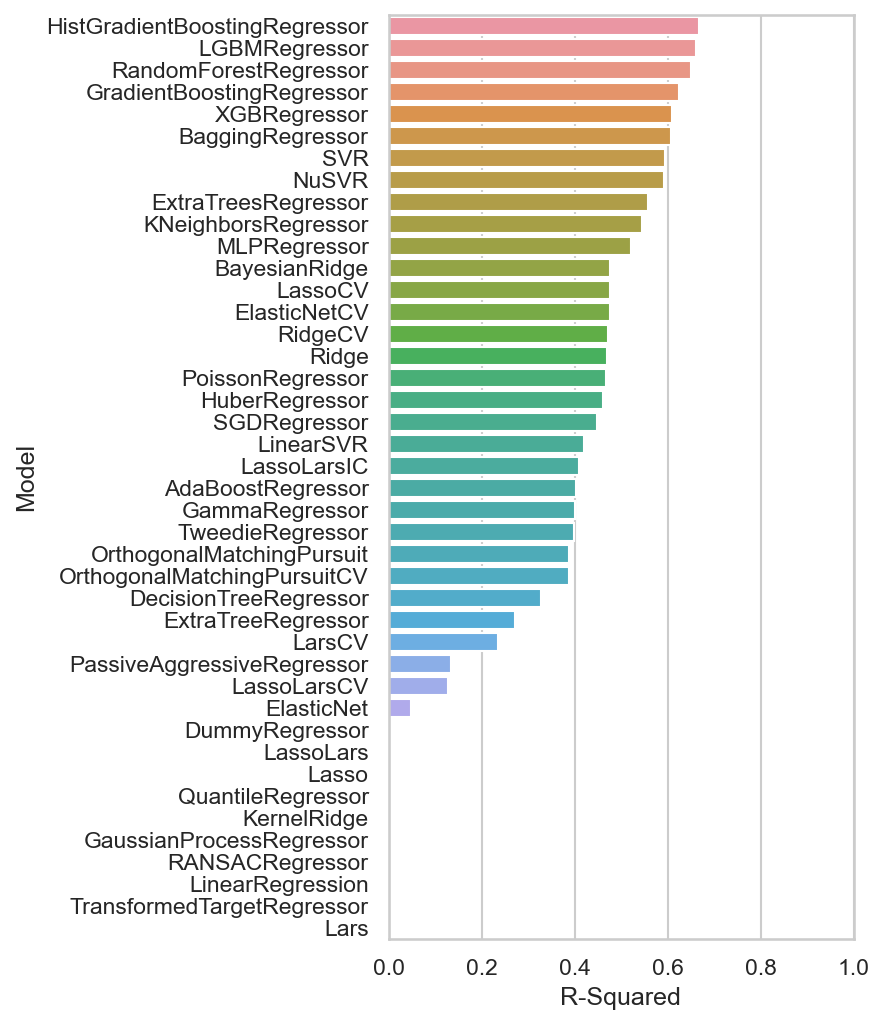

In [14]:
# Bar plot of R-squared values for test set

plt.figure(figsize=(4, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

# Rerun ML model with highest accuracy

In [27]:
model = HistGradientBoostingRegressor(learning_rate=0.08)
model.fit(X_train, Y_train)
r2_HGBR = model.score(X_test, Y_test)
r2_HGBR

0.6736760619154218

In [28]:
Y_pred_HGBR = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

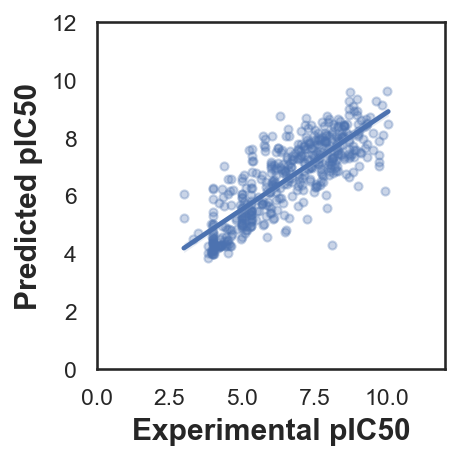

In [29]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred_HGBR, scatter_kws={'alpha':0.3, 's':15})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(3, 3)
plt.show